In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Load the dataset

In [2]:
data=pd.read_csv("D:/Datatrained projects/data/Advertising.csv")
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
# check the shape of data shape
data.shape

(200, 5)

In [4]:
# checking statistical summary of datdset
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
# droop the column unnamed 0
data.drop(columns=["Unnamed: 0"],inplace=True,axis=1)

In [6]:
# check for duplicate values
duplicate=data.duplicated().sum()
duplicate

0

In [7]:
# checking null values
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

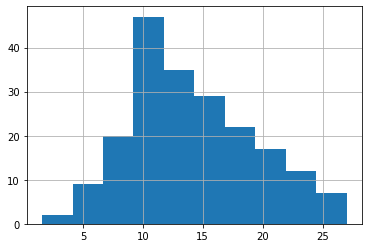

In [8]:
# target variable checking for imbalance
data['sales'].hist()

In [9]:
data['sales'].value_counts()  # looks like label is continuous in nature

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

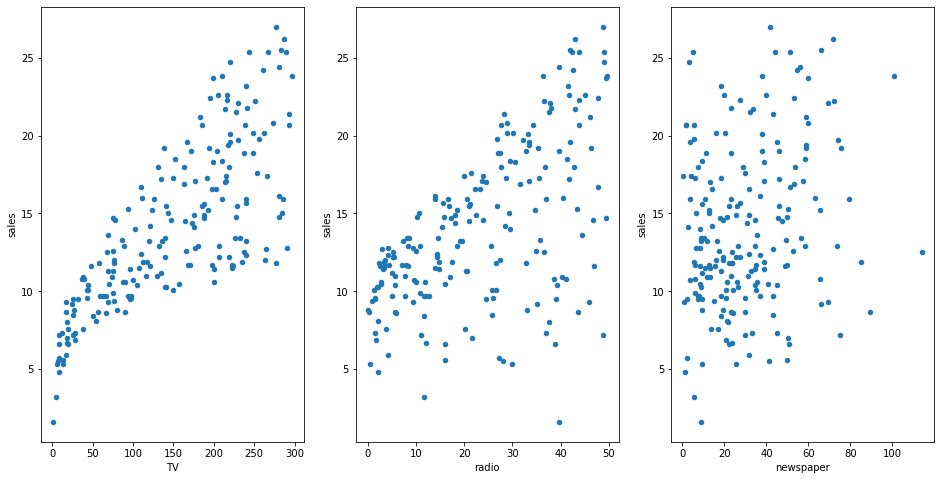

In [10]:
# checking distribution using scatterplot
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

 from scatterplot we can conclude that there is positive relation between tv and sales ,and radio and sales but can see there is no relationship between newspaper and sale

In [11]:
# checking correlation
corr_matrix=data.corr()
corr_matrix

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


from correlation we can see that there very less coorelation between sales and newspaper.

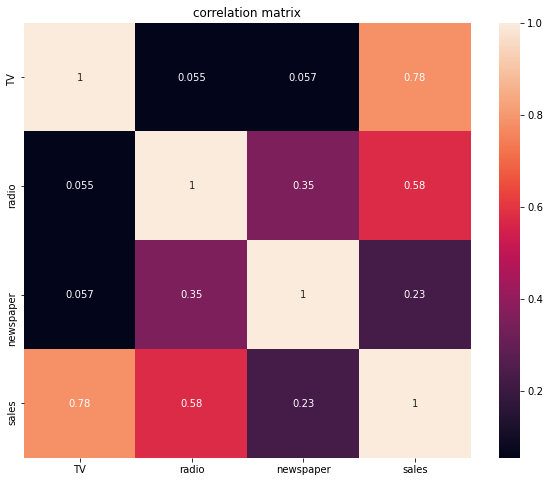

In [12]:
# plotting heatmap of correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('correlation matrix')
plt.show()

from heatmap we can see that there is stronger relationship tv,radio and sales.and little relationship betn newspaper and sales so we can drop it

In [13]:
# dropping the newspaper column
data=data.drop(columns=['newspaper'])
data

,TV,radio,sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


C:\Users\gkumb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gkumb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gkumb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

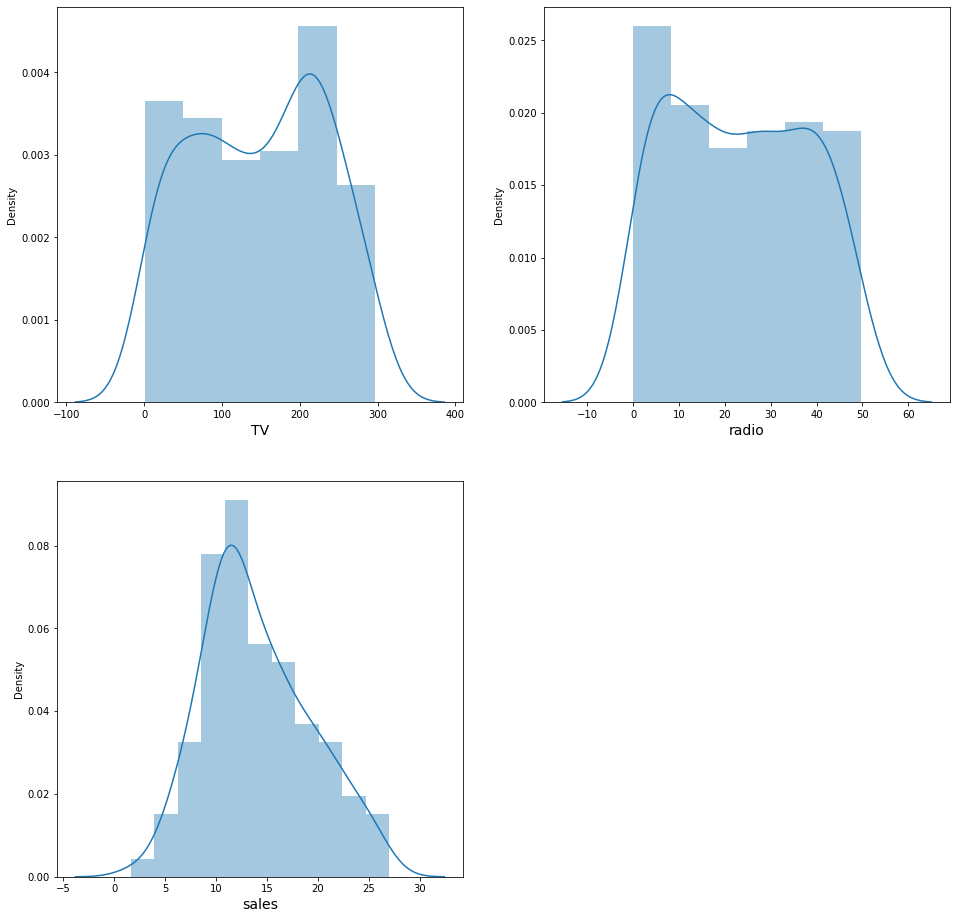

In [14]:
# Data Distribution 
plt.figure(figsize=(16,16))
plotnumber=1
for column in data: 
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1 
plt.show()

from above distribution we can see that there is a skewness in data

In [15]:
# Splitting data into feature and label
x=data.drop('sales',axis=1)
y=data.sales

In [16]:
x

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8
...,...,...
195,38.2,3.7
196,94.2,4.9
197,177.0,9.3
198,283.6,42.0


In [17]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [18]:
# checking skewness
x.skew()

TV      -0.069853
radio    0.094175
dtype: float64

In [19]:
# using the power transform function to remove skewnesss
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)
x

,TV,radio
0,0.948674,0.962247
1,-1.191314,1.040179
2,-1.647757,1.370710
3,0.141020,1.142387
4,0.452715,-0.748651
...,...,...
195,-1.287908,-1.431436
196,-0.520949,-1.297017
197,0.413091,-0.875492
198,1.455843,1.177722


In [20]:
#vaalidating the skewnee
sk=x.skew()

In [21]:
sk[np.abs(sk)>0.25].all()

True

As showing true so skewness removed

C:\Users\gkumb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gkumb\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


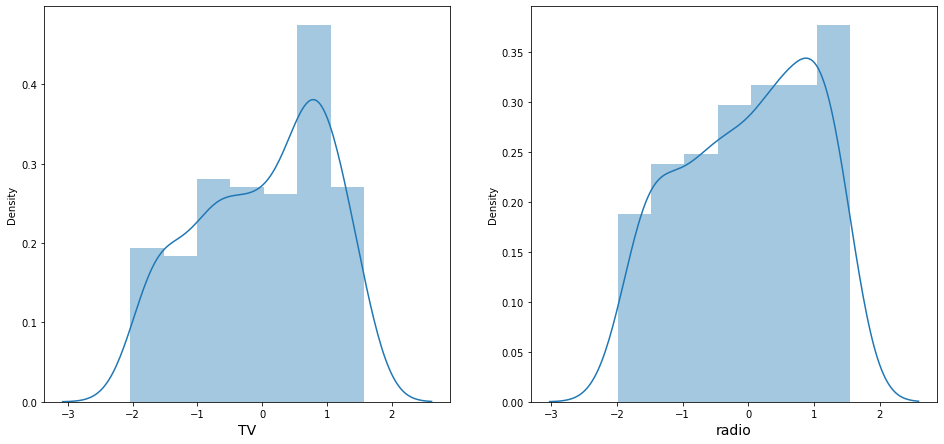

In [22]:
# data distribution 
# Data Distribution 
plt.figure(figsize=(16,16))
plotnumber=1
for column in x: 
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1 
plt.show()

<AxesSubplot:>

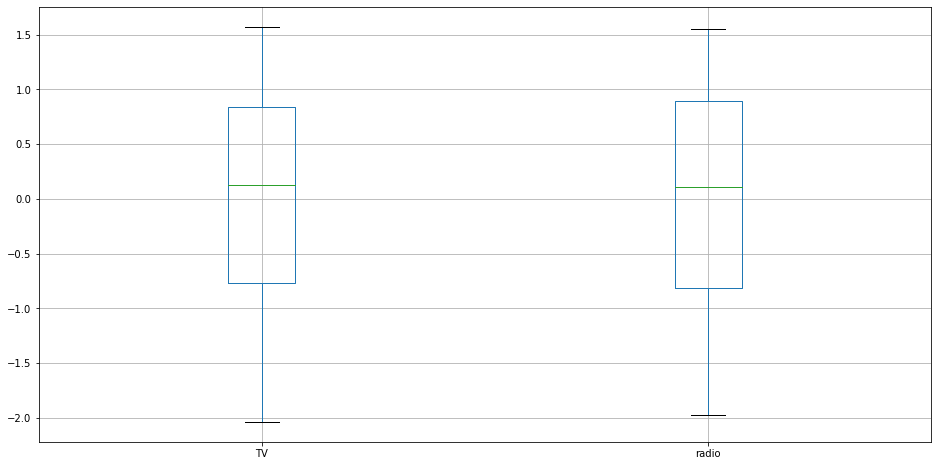

In [23]:
# checking outliers with boxplot
x.boxplot(figsize=(16,8))

From boxplot we can see that are no outliers

## Data scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

## Split the data in train and test

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=12354)

## Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
y_pred=lr.predict(x_test)
y_pred

array([10.26465948,  1.933149  , 20.18237213,  3.72673164, 15.49939664,
       21.18082964, 20.51878294, 22.54982296, 22.58117948, 10.30521854,
       18.03833551, 20.60242032, 17.84360024, 12.21499725, 10.2242967 ,
       14.41620577, 23.71124098, 10.53023765, 16.84902869,  2.33042085,
       13.76935549,  8.2672539 ,  4.63886066,  8.26149007, 11.38219586,
       11.3932159 , 17.48726077, 13.54221231, 10.09650995, 14.98425622,
       19.90297611, 15.77340662, 11.99235045, 20.87790549,  7.68715188,
       10.36779324, 11.65225402, 13.14279388, 12.52656095,  9.8596781 ,
       17.19351001, 14.88447793, 12.15046096,  5.89714545,  7.80400891,
       10.49867972,  9.91866762, 21.32855144, 12.17570406, 21.65270819])

## Model Evaluation

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,y_pred)

1.3097167430478631

In [46]:
a=mean_squared_error(y_test,y_pred)
a

2.8417304985183125

In [47]:
np.sqrt(a)

1.6857433074220738